# prinPy Quick-start Guide

### Load in "local" module 
Currently, prinPy only has local algorithms. Eventually, there will be a global module as well. 

In [1]:
import sys
sys.path.append('C:/Users/artus/Git/prinPy')
from prinpy.local import *

# Some other modules
import numpy as np
import matplotlib.pyplot as plt
import timeit

***
## Example 1: A Simple Spiral

### Generate Test Data

In [2]:
theta = np.linspace(0,np.pi*3, 1000)
r = np.linspace(0,1,1000) ** .5

x_data = r * np.cos(theta) + np.random.normal(scale = .02, size = 1000)
y_data = r * np.sin(theta) + np.random.normal(scale = .02, size = 1000)

### Plot

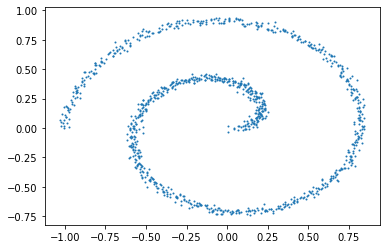

In [3]:
plt.scatter(x_data, y_data, s = 1)
plt.show()

### Fit Principal Curve with Local Algorithms

In [4]:
cl = CLPCG()  # Create CLPCG object

# the calc_pc method calculates the principal curve
# e_max is determined through trial and error as of
# now, but aim for about 1/2 data error and adjust from
# there. 
start = timeit.default_timer()

cl.fit(x_data, y_data, e_max = .02)  # CLPCG.fit() to fit PC

stop = timeit.default_timer()

print("Took %f seconds" % (stop - start))

Took 0.317372 seconds


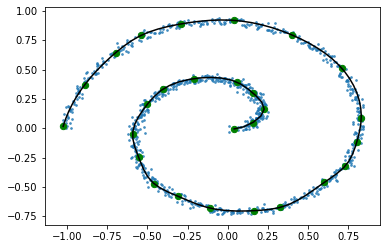

In [5]:
fig, ax = plt.subplots()
ax.scatter(x_data, y_data, s = 3, alpha = .7)
cl.plot(ax)     # .plot will display the fit curve.
                # you can optionally pass in a matplotlib ax
pts = cl.fit_points   # fitted points with PC that spline is passed through
ax.scatter(pts[:,0], pts[:,1], s = 40, c = 'green')

In [6]:
# .proj will return a projection index for each point
proj = cl.project(x_data, y_data) 

In [7]:
print(proj[:5])

[array(-0.00636275), array(-0.00934291), array(-0.00453851), array(-0.00732451), array(-0.00466959)]


In [8]:
# additionally, you can get spline ticks or fit points:
tck = cl.spline_ticks

In [9]:
print(tck[0])

[0.         0.         0.         0.         0.04098779 0.06344385
 0.08556776 0.12692561 0.15884265 0.18440133 0.22562079 0.25702913
 0.29507652 0.32298826 0.35737733 0.39934004 0.42471408 0.47866223
 0.50838796 0.54073334 0.57377621 0.64164301 0.70560661 0.76435447
 0.81540005 0.85695439 0.89014272 1.         1.         1.
 1.        ]


### Compare Speeds:

In [10]:
greedy = CLPCG()
search = CLPCS()

start1 = timeit.default_timer()
greedy.fit(x_data, y_data, e_max = .02)
stop1 = timeit.default_timer()

start2 = timeit.default_timer()
search.fit(x_data, y_data, e_max = .02)
stop2 = timeit.default_timer()

print("Greedy alg took %f seconds" % (stop1 - start1))
print("Search alg took %f seconds" % (stop2 - start2))

Greedy alg took 0.275952 seconds
Search alg took 6.511804 seconds


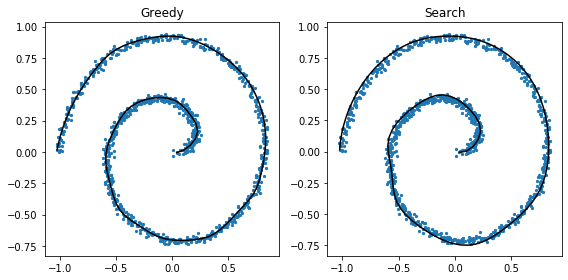

In [11]:
fig, ax = plt.subplots(1,2, figsize = (8,4))
greedy.plot(ax[0])
search.plot(ax[1])
for ax_ in ax:
    ax_.scatter(x_data, y_data, s = 5)
    
ax[0].set_title('Greedy'); ax[1].set_title("Search")
plt.tight_layout()

***
## Example 2: Sine Wave

In [12]:
x_sine = np.linspace(0,4*np.pi,1000) + np.random.normal(scale = .1, size = 1000)
y_sine = np.sin(x_sine) + np.random.normal(scale = .1, size = 1000)

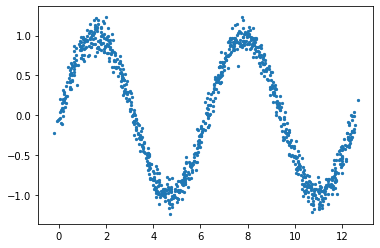

In [13]:
plt.scatter(x_sine, y_sine, s = 5)

In [27]:
start1 = timeit.default_timer()
greedy.fit(x_sine, y_sine, e_max = .2)
stop1 = timeit.default_timer()

start2 = timeit.default_timer()
search.fit(x_sine, y_sine, e_max = .1)
stop2 = timeit.default_timer()

print("Greedy alg took %f seconds" % (stop1 - start1))
print("Search alg took %f seconds" % (stop2 - start2))

Greedy alg took 0.181093 seconds
Search alg took 5.926959 seconds


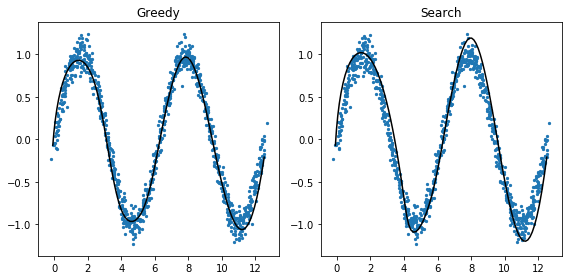

In [28]:
fig, ax = plt.subplots(1,2, figsize = (8,4))
greedy.plot(ax[0])
search.plot(ax[1])
for ax_ in ax:
    ax_.scatter(x_sine, y_sine, s = 5)
    
ax[0].set_title('Greedy'); ax[1].set_title("Search")
plt.tight_layout()

While the search algorithm can allow for a smaller error, it wont always look better.